# 构造url

In [2]:
# 循环生成网址，并存入网址列表中
url_list = []    # 生成空列表，用于存储网址
template = 'https://book.douban.com/top250?start={num}'
for p in range(1,11):   # range取1到10
    url = template.format(num=(p-1)*25)    # 取1时，为(1-1)*25，即num为0，以此类推
    url_list.append(url)   # 将上面获得的url【添加进】列表
    
url_list

['https://book.douban.com/top250?start=0',
 'https://book.douban.com/top250?start=25',
 'https://book.douban.com/top250?start=50',
 'https://book.douban.com/top250?start=75',
 'https://book.douban.com/top250?start=100',
 'https://book.douban.com/top250?start=125',
 'https://book.douban.com/top250?start=150',
 'https://book.douban.com/top250?start=175',
 'https://book.douban.com/top250?start=200',
 'https://book.douban.com/top250?start=225']

# 请求+获取网页数据	

In [1]:
import requests   # 导入requests包

url = 'https://book.douban.com/top250'
# 尝试加入user-agent
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
           Chrome/119.0.0.0 Safari/537.36 Edg/119.0.0.0'}
resp = requests.get(url, headers=headers)  # 设置参数headers
resp #返回码200说明访问成功

<Response [200]>

In [3]:
# 查看返回内容，搜索该页面的“红楼梦”是否在返回的文本中，确认与网页一致
resp.text

'\n\n<!DOCTYPE html>\n<html lang="zh-cmn-Hans" class="ua-windows ua-webkit book-new-nav">\n<head>\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n  <title>豆瓣读书 Top 250</title>\n  \n<script>!function(e){var o=function(o,n,t){var c,i,r=new Date;n=n||30,t=t||"/",r.setTime(r.getTime()+24*n*60*60*1e3),c="; expires="+r.toGMTString();for(i in o)e.cookie=i+"="+o[i]+c+"; path="+t},n=function(o){var n,t,c,i=o+"=",r=e.cookie.split(";");for(t=0,c=r.length;t<c;t++)if(n=r[t].replace(/^\\s+|\\s+$/g,""),0==n.indexOf(i))return n.substring(i.length,n.length).replace(/\\"/g,"");return null},t=e.write,c={"douban.com":1,"douban.fm":1,"google.com":1,"google.cn":1,"googleapis.com":1,"gmaptiles.co.kr":1,"gstatic.com":1,"gstatic.cn":1,"google-analytics.com":1,"googleadservices.com":1},i=function(e,o){var n=new Image;n.onload=function(){},n.src="https://www.douban.com/j/except_report?kind=ra022&reason="+encodeURIComponent(e)+"&environment="+encodeURIComponent(o)},r=function(o){try{t.call

In [4]:
# 将返回内容放入html中，html为str
html = resp.text
html
type(html)

str

**构造函数**

In [3]:
def get_html(url):         # 添加：定义函数名
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
           Chrome/119.0.0.0 Safari/537.36 Edg/119.0.0.0'}
    resp = requests.get(url,headers=headers)
    html = resp.text
    return html            # 添加：返回网址的html数据

# 解析数据

In [8]:
from pyquery import PyQuery as pq #导入pyquery包


In [10]:

doc = pq(html) # 将html字符串转换为pyquery数据，便于解析
type(doc)   # 数据类型为pyquery.pyquery.PyQuery
doc.text()    # 数据变“干净”了

'豆瓣读书 Top 250\n!function(e){var o=function(o,n,t){var c,i,r=new Date;n=n||30,t=t||"/",r.setTime(r.getTime()+24*n*60*60*1e3),c="; expires="+r.toGMTString();for(i in o)e.cookie=i+"="+o[i]+c+"; path="+t},n=function(o){var n,t,c,i=o+"=",r=e.cookie.split(";");for(t=0,c=r.length;t<c;t++)if(n=r[t].replace(/^\\s+|\\s+$/g,""),0==n.indexOf(i))return n.substring(i.length,n.length).replace(/\\"/g,"");return null},t=e.write,c={"douban.com":1,"douban.fm":1,"google.com":1,"google.cn":1,"googleapis.com":1,"gmaptiles.co.kr":1,"gstatic.com":1,"gstatic.cn":1,"google-analytics.com":1,"googleadservices.com":1},i=function(e,o){var n=new Image;n.onload=function(){},n.src="https://www.douban.com/j/except_report?kind=ra022&reason="+encodeURIComponent(e)+"&environment="+encodeURIComponent(o)},r=function(o){try{t.call(e,o)}catch(e){t(o)}},a=/<script.*?src\\=["\']?([^"\'\\s>]+)/gi,g=/http:\\/\\/(.+?)\\.([^\\/]+).+/i;e.writeln=e.write=function(e){var t,l=a.exec(e);return l&&(t=g.exec(l[1]))?c[t[2]]?void r(e):void(

**目标信息源代码（部分）**

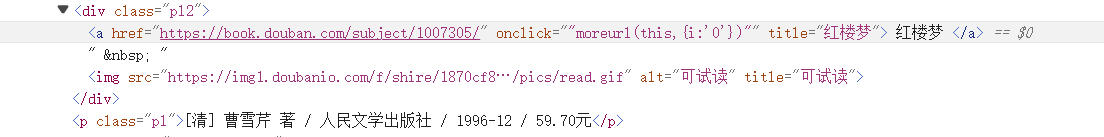

In [16]:
titles = doc('div.pl2 a') # 找到所有书名
print(titles)

<a href="https://book.douban.com/subject/1007305/" onclick="&quot;moreurl(this,{i:'0'})&quot;" title="&#x7EA2;&#x697C;&#x68A6;">
                红楼梦

                
              </a>



                  <a href="https://book.douban.com/subject/4913064/" onclick="&quot;moreurl(this,{i:'1'})&quot;" title="&#x6D3B;&#x7740;">
                活着

                
              </a>



                  <a href="https://book.douban.com/subject/24531956/" onclick="&quot;moreurl(this,{i:'2'})&quot;" title="&#x54C8;&#x5229;&#xB7;&#x6CE2;&#x7279;">
                哈利·波特

                
              </a>




              
                <a href="https://book.douban.com/subject/4820710/" onclick="&quot;moreurl(this,{i:'3'})&quot;" title="1984">
                1984

                
              </a>




              
                <a href="https://book.douban.com/subject/6518605/" onclick="&quot;moreurl(this,{i:'4'})&quot;" title="&#x4E09;&#x4F53;&#x5168;&#x96C6;">
                三体

In [14]:
for title in titles:
    print(pq(title).text())

红楼梦
活着
哈利·波特
1984
三体全集 : 地球往事三部曲
百年孤独
飘
动物农场
房思琪的初恋乐园
三国演义（全二册）
福尔摩斯探案全集（上中下）
白夜行
小王子
安徒生童话故事集
天龙八部
撒哈拉的故事
呐喊
邓小平时代
悉达多 : 一首印度的诗
杀死一只知更鸟
失踪的孩子 : 那不勒斯四部曲4
明朝那些事儿（1-9） : 限量版
新名字的故事 : 那不勒斯四部曲2
野草
沉默的大多数 : 王小波杂文随笔全编


**构造函数**

In [4]:
def get_book_name(html):
    doc = pq(html)
    titles = doc('div.pl2 a')
    for title in titles:
        print(pq(title).text())
    

# 使用循环，调用函数进行爬取

In [9]:
for url in url_list:
    html = get_html(url)
    get_book_name(html)

正在采集https://book.douban.com/top250?start=0
红楼梦
活着
哈利·波特
1984
三体全集 : 地球往事三部曲
百年孤独
飘
动物农场
房思琪的初恋乐园
三国演义（全二册）
福尔摩斯探案全集（上中下）
白夜行
小王子
安徒生童话故事集
天龙八部
撒哈拉的故事
呐喊
邓小平时代
悉达多 : 一首印度的诗
杀死一只知更鸟
失踪的孩子 : 那不勒斯四部曲4
明朝那些事儿（1-9） : 限量版
新名字的故事 : 那不勒斯四部曲2
野草
沉默的大多数 : 王小波杂文随笔全编
正在采集https://book.douban.com/top250?start=25
中国历代政治得失
局外人
白鹿原 : 20周年精装典藏版
卡拉马佐夫兄弟
彷徨
平凡的世界（全三部）
人类简史 : 从动物到上帝
乡土中国
罗杰疑案 : 阿加莎·克里斯蒂作品02
围城
许三观卖血记
笑傲江湖（全四册）
我与地坛 : 史铁生代表作
献给阿尔吉侬的花束
东方快车谋杀案
肖申克的救赎
基督山伯爵
江城
故事新编
城南旧事 : 纪念普及版
霍乱时期的爱情
朝花夕拾
艺术的故事
万历十五年
月亮和六便士
正在采集https://book.douban.com/top250?start=50
厌女 : 日本的女性嫌恶
射雕英雄传
置身事内 : 中国政府与经济发展
秋园
追风筝的人
寻路中国 : 从乡村到工厂的自驾之旅
刀锋
树上的男爵
中国少年儿童百科全书（全四册）
格林童话全集
无人生还
西游记（全二册）
嫌疑人X的献身
鼠疫
可能性的艺术 : 比较政治学30讲
黄金时代 : 时代三部曲
史记（全十册） : （全十册）
始于极限 : 女性主义往复书简
傲慢与偏见
台北人
悲惨世界（上中下）
诗经
孽子
刘擎西方现代思想讲义
太白金星有点烦
正在采集https://book.douban.com/top250?start=75
永恒的终结 : 关于时间旅行的终极奥秘和恢宏构想
神雕侠侣
历史深处的忧虑 : 近距离看美国之一
美丽新世界
上帝掷骰子吗 : 量子物理史话
一个叫欧维的男人决定去死
唐诗三百首
四世同堂
美的历程
灿烂千阳
哭泣的骆驼
最好的告别 : 关于衰老与死亡，你必须知道的常识
文学回忆录 : 1989—1994
窗边的小豆豆
人间词话
呼兰河传 : 194